<a href="https://colab.research.google.com/github/DineshKumarS26/INSE-6220-CARDIOVASCULAR-FINAL-PROJECT/blob/main/INSE6220_PCA_Cardiovascular_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Principal Component Analysis of Cardiovascular Disease Dataset**

### **Install pycaret**

In [1]:
!pip install pycaret==3.0.0

  Using cached pycaret-3.0.0-py3-none-any.whl (481 kB)
  Attempting uninstall: pycaret
    Found existing installation: pycaret 3.2.0
    Uninstalling pycaret-3.2.0:
      Successfully uninstalled pycaret-3.2.0


In [2]:
from pycaret.utils import version
version()

'3.0.0'

**Import Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


**DataSet**

The dataset utilized for Principal Component Analysis (PCA) and classification models, known as the "Cardiovascular Data Set," was sourced from Kaggle. This dataset includes information on diverse features and their corresponding outcomes, ultimately revealing whether a cardiovascular disease is present or absent.

There are 11 features or attribute columns and one column for classification where 0 represents "Absense of Cardiovascular Disease" and 1 represents "Presence of Cardiovascular Disease"

The attributes of the dataset are
Age = age in Days
Height = height in cm
Weight = weight in kg
Gender = gender
Systolic blood pressure = ap_hi
Diastolic blood pressure = ap_lo
Cholesterol = cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose = gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking = smoke
Alcohol intake = alco
Physical activity = active
Presence or absence of cardiovascular disease = cardio

The orginal dataset can be found in this link = https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/DineshKumarS26/Cardiovascular-Project_INSE-6220-/main/6220%20DATA%20SET%20csv.csv')
df.head(25)

id  age in days  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0    0        18393       2     168    62.0    110     80            1     1   
1    1        20228       1     156    85.0    140     90            3     1   
2    2        18857       1     165    64.0    130     70            3     1   
3    3        17623       2     169    82.0    150    100            1     1   
4    4        17474       1     156    56.0    100     60            1     1   
5    8        21914       1     151    67.0    120     80            2     2   
6    9        22113       1     157    93.0    130     80            3     1   
7   12        22584       2     178    95.0    130     90            3     3   
8   13        17668       1     158    71.0    110     70            1     1   
9   14        19834       1     164    68.0    110     60            1     1   
10  15        22530       1     169    80.0    120     80            1     1   
11  16        18815       2     173    60.0    120     80            1     1   
12  18        14791       2     165    60.0    120     80            1     1   
13  21        19809       1     158    78.0    110     70            1     1   
14  23        14532       2     181    95.0    130     90            1     1   
15  24        16782       2     172   112.0    120     80            1     1   
16  25        21296       1     170    75.0    130     70            1     1   
17  27        16747       1     158    52.0    110     70            1     3   
18  28        17482       1     154    68.0    100     70            1     1   
19  29        21755       2     162    56.0    120     70            1     1   
20  30        19778       2     163    83.0    120     80            1     1   
21  31        21413       1     157    69.0    130     80            1     1   
22  32        23046       1     158    90.0    145     85            2     2   
23  33        23376       2     156    45.0    110     60            1     1   
24  35        16608       1     170    68.0    150     90            3     1   

    smoke  alco  active  cardio  
0       0     0       1       0  
1       0     0       1       1  
2       0     0       0       1  
3       0     0       1       1  
4       0     0       0       0  
5       0     0       0       0  
6       0     0       1       0  
7       0     0       1       1  
8       0     0       1       0  
9       0     0       0       0  
10      0     0       1       0  
11      0     0       1       0  
12      0     0       0       0  
13      0     0       1       0  
14      1     1       1       0  
15      0     0       0       1  
16      0     0       0       0  
17      0     0       1       0  
18      0     0       0       0  
19      1     0       1       0  
20      0     0       1       0  
21      0     0       1       0  
22      0     0       1       1  
23      0     0       1       0  
24      0     0       1       1

In [6]:
len(df.index)

1999

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1999 non-null   int64  
 1   age in days  1999 non-null   int64  
 2   gender       1999 non-null   int64  
 3   height       1999 non-null   int64  
 4   weight       1999 non-null   float64
 5   ap_hi        1999 non-null   int64  
 6   ap_lo        1999 non-null   int64  
 7   cholesterol  1999 non-null   int64  
 8   gluc         1999 non-null   int64  
 9   smoke        1999 non-null   int64  
 10  alco         1999 non-null   int64  
 11  active       1999 non-null   int64  
 12  cardio       1999 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 203.1 KB


In [8]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [9]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

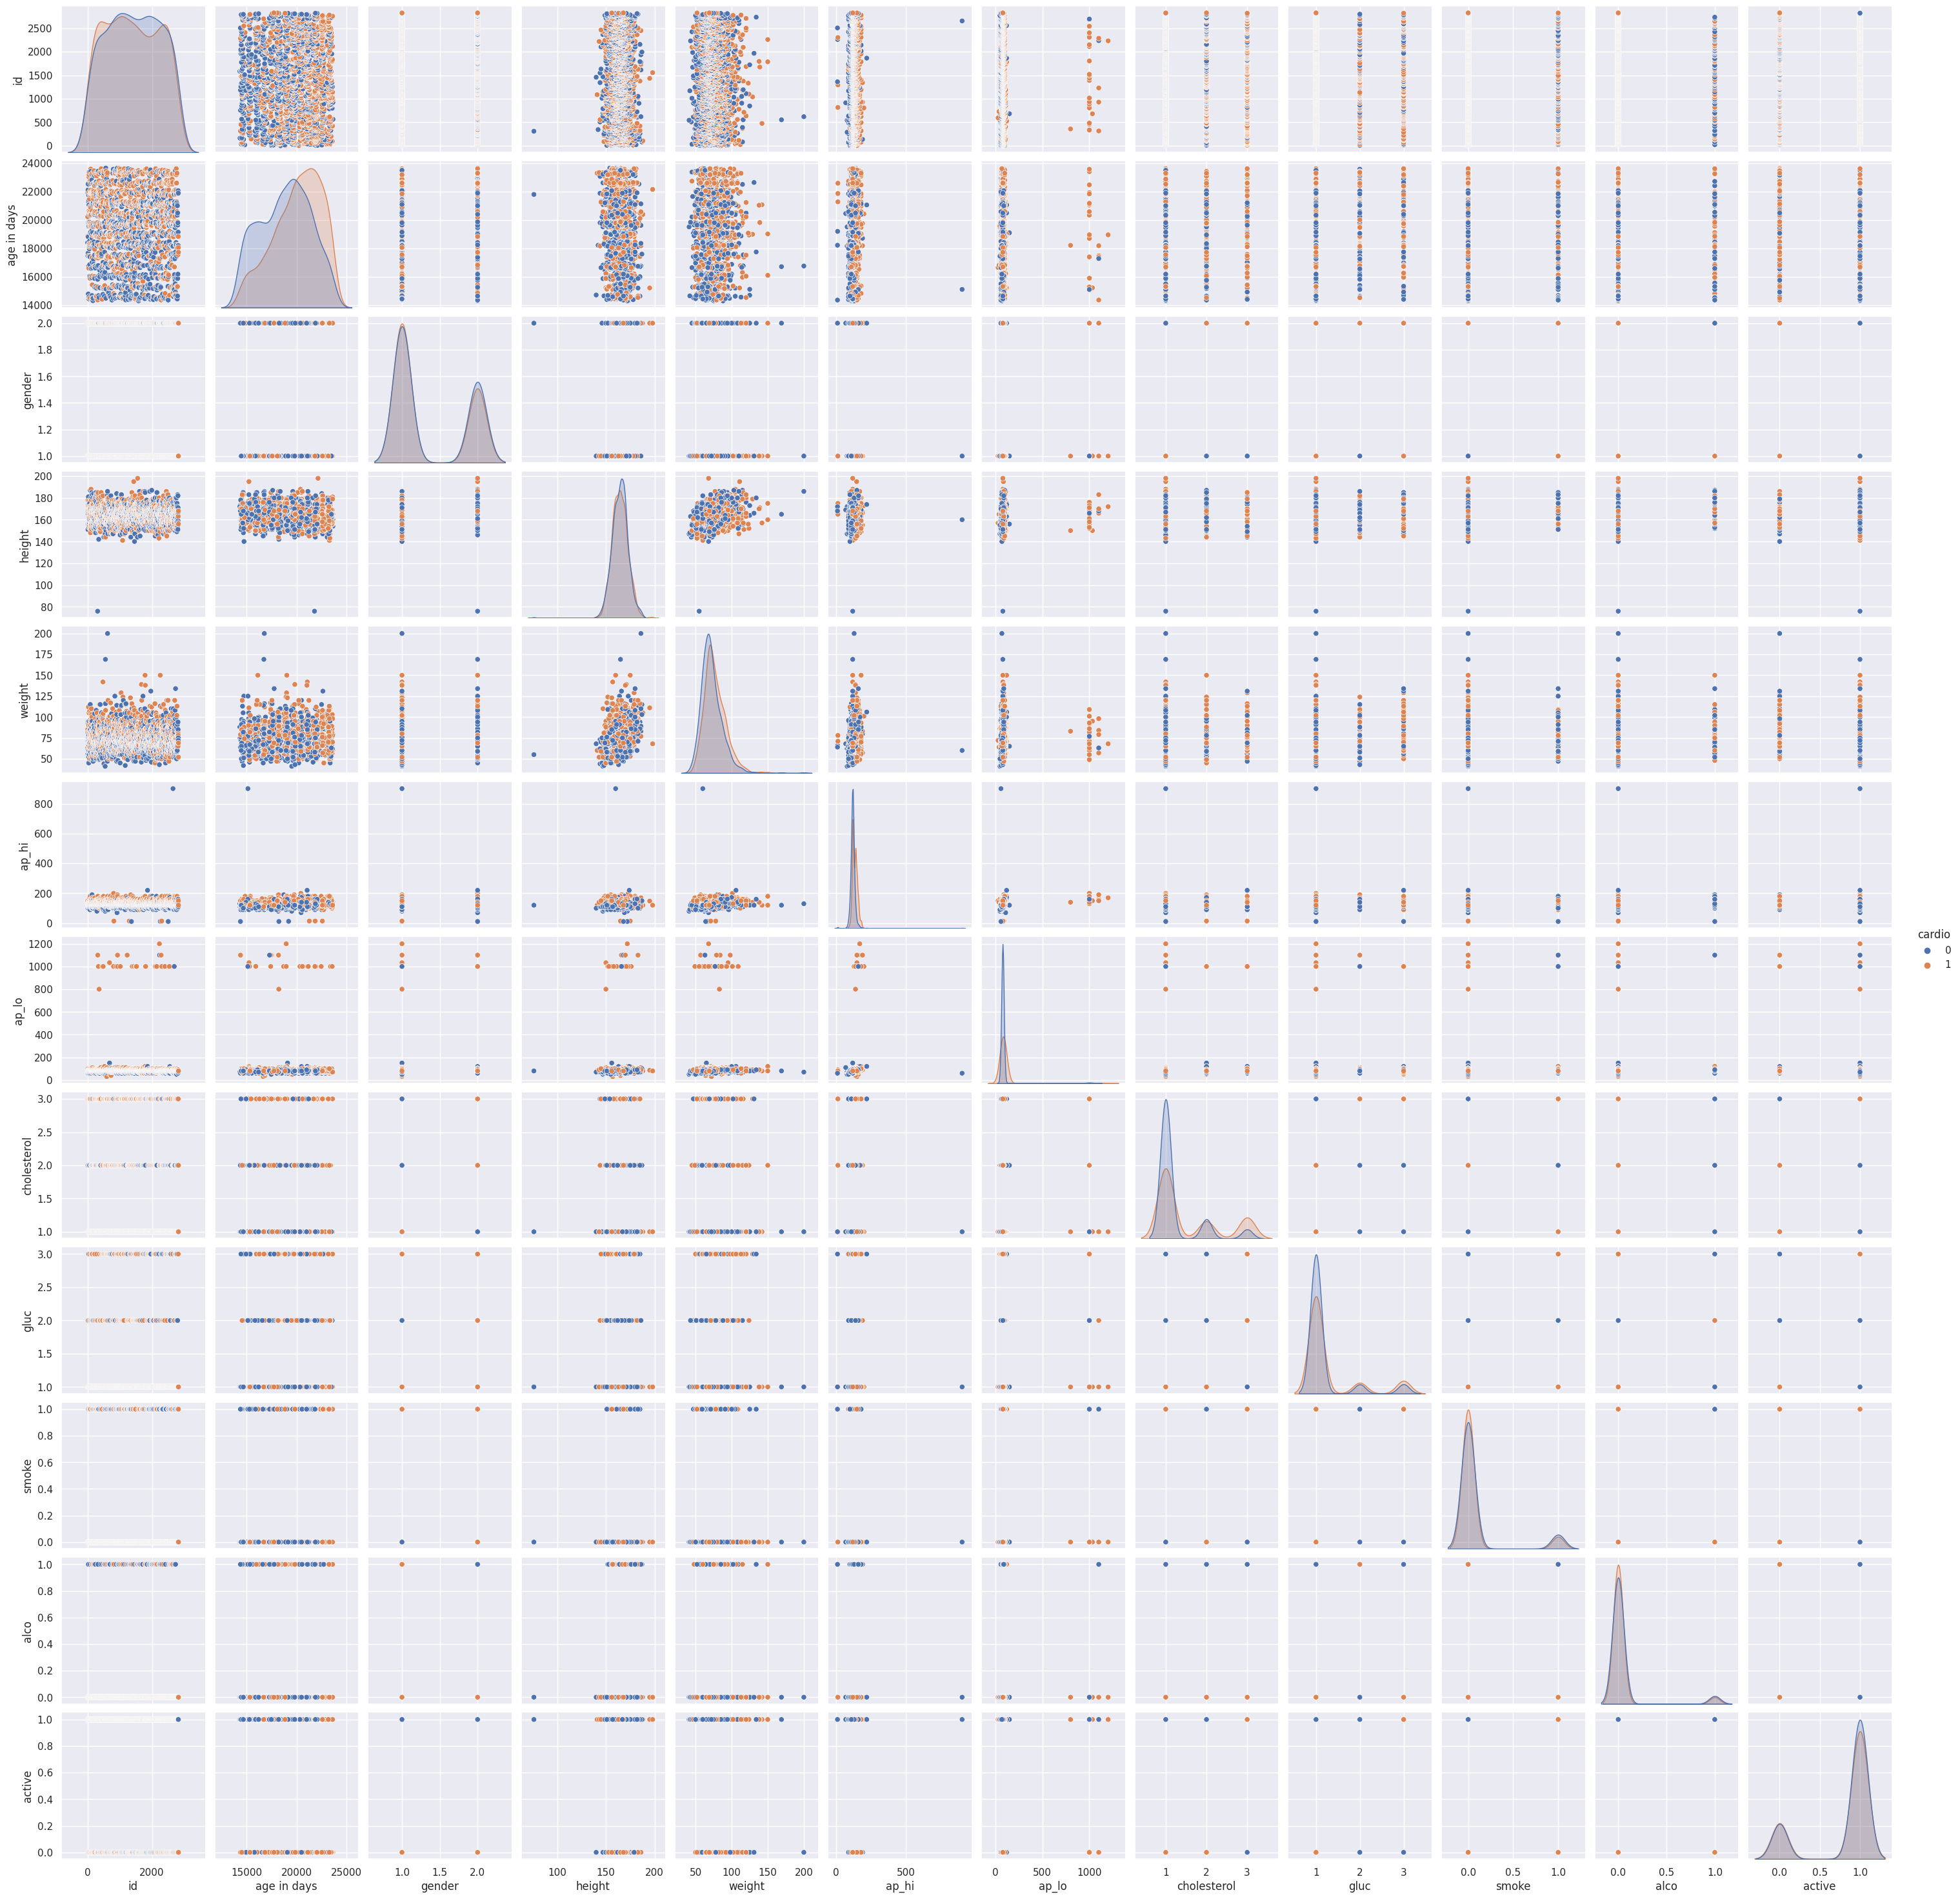

In [10]:
sns.pairplot(df, hue='cardio')
plt.show()

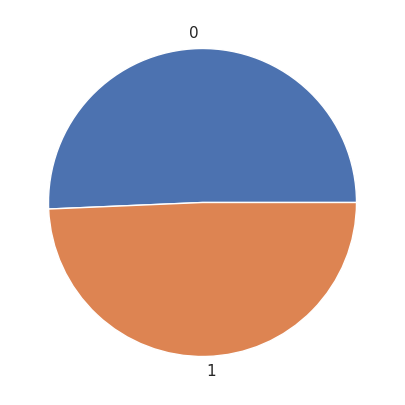

In [11]:
y =df['cardio']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [12]:
X = df.drop(columns=['cardio'])
X.head(10)

id  age in days  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0   0        18393       2     168    62.0    110     80            1     1   
1   1        20228       1     156    85.0    140     90            3     1   
2   2        18857       1     165    64.0    130     70            3     1   
3   3        17623       2     169    82.0    150    100            1     1   
4   4        17474       1     156    56.0    100     60            1     1   
5   8        21914       1     151    67.0    120     80            2     2   
6   9        22113       1     157    93.0    130     80            3     1   
7  12        22584       2     178    95.0    130     90            3     3   
8  13        17668       1     158    71.0    110     70            1     1   
9  14        19834       1     164    68.0    110     60            1     1   

   smoke  alco  active  
0      0     0       1  
1      0     0       1  
2      0     0       0  
3      0     0       1  
4      0     0       0  
5      0     0       0  
6      0     0       1  
7      0     0       1  
8      0     0       1  
9      0     0       0

In [13]:
X.describe().transpose()

count          mean          std      min      25%      50%  \
id           1999.0   1405.555778   815.235185      0.0    717.0   1387.0   
age in days  1999.0  19441.811406  2506.400679  14307.0  17556.0  19714.0   
gender       1999.0      1.360180     0.480173      1.0      1.0      1.0   
height       1999.0    164.385193     8.073902     76.0    159.0    165.0   
weight       1999.0     74.400150    14.898606     41.0     65.0     72.0   
ap_hi        1999.0    126.881441    24.948284     11.0    120.0    120.0   
ap_lo        1999.0     93.503752   107.139104     30.0     80.0     80.0   
cholesterol  1999.0      1.382191     0.694612      1.0      1.0      1.0   
gluc         1999.0      1.237619     0.587717      1.0      1.0      1.0   
smoke        1999.0      0.089545     0.285600      0.0      0.0      0.0   
alco         1999.0      0.052026     0.222135      0.0      0.0      0.0   
active       1999.0      0.789895     0.407485      0.0      1.0      1.0   

                 75%      max  
id            2116.5   2825.0  
age in days  21297.5  23661.0  
gender           2.0      2.0  
height         170.0    198.0  
weight          82.5    200.0  
ap_hi          140.0    902.0  
ap_lo           90.0   1200.0  
cholesterol      2.0      3.0  
gluc             1.0      3.0  
smoke            0.0      1.0  
alco             0.0      1.0  
active           1.0      1.0

**Standardize the Data**

In [14]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

id  age in days    gender    height    weight     ap_hi     ap_lo  \
0 -1.724542    -0.418558  1.332812  0.447827 -0.832511 -0.676827 -0.126071   
1 -1.723315     0.313751 -0.750293 -1.038815  0.711644  0.525962 -0.032711   
2 -1.722088    -0.233386 -0.750293  0.076167 -0.698237  0.125032 -0.219431   
3 -1.720861    -0.725848  1.332812  0.571714  0.510232  0.926891  0.060649   
4 -1.719634    -0.785311 -0.750293 -1.038815 -1.235334 -1.077756 -0.312791   
5 -1.714727     0.986597 -0.750293 -1.658249 -0.496825 -0.275897 -0.126071   
6 -1.713500     1.066014 -0.750293 -0.914928  1.248741  0.125032 -0.126071   
7 -1.709819     1.253979  1.332812  1.686696  1.383016  0.125032 -0.032711   
8 -1.708592    -0.707890 -0.750293 -0.791041 -0.228276 -0.676827 -0.219431   
9 -1.707365     0.156514 -0.750293 -0.047720 -0.429688 -0.676827 -0.312791   

   cholesterol      gluc     smoke      alco    active  
0    -0.550360 -0.404410 -0.313611 -0.234268  0.515743  
1     2.329666 -0.404410 -0.313611 -0.234268  0.515743  
2     2.329666 -0.404410 -0.313611 -0.234268 -1.938949  
3    -0.550360 -0.404410 -0.313611 -0.234268  0.515743  
4    -0.550360 -0.404410 -0.313611 -0.234268 -1.938949  
5     0.889653  1.297516 -0.313611 -0.234268 -1.938949  
6     2.329666 -0.404410 -0.313611 -0.234268  0.515743  
7     2.329666  2.999442 -0.313611 -0.234268  0.515743  
8    -0.550360 -0.404410 -0.313611 -0.234268  0.515743  
9    -0.550360 -0.404410 -0.313611 -0.234268 -1.938949

In [15]:
X.describe().transpose()

count          mean      std        min       25%       50%  \
id           1999.0  0.000000e+00  1.00025  -1.724542 -0.844821 -0.022767   
age in days  1999.0  3.305677e-16  1.00025  -2.049192 -0.752586  0.108625   
gender       1999.0 -1.155210e-17  1.00025  -0.750293 -0.750293 -0.750293   
height       1999.0  1.133883e-15  1.00025 -10.949763 -0.667155  0.076167   
weight       1999.0 -7.464431e-16  1.00025  -2.242392 -0.631099 -0.161139   
ap_hi        1999.0  2.274874e-16  1.00025  -4.646028 -0.275897 -0.275897   
ap_lo        1999.0  4.931856e-17  1.00025  -0.592871 -0.126071 -0.126071   
cholesterol  1999.0  1.066347e-16  1.00025  -0.550360 -0.550360 -0.550360   
gluc         1999.0  2.301533e-16  1.00025  -0.404410 -0.404410 -0.404410   
smoke        1999.0 -7.286706e-17  1.00025  -0.313611 -0.313611 -0.313611   
alco         1999.0  1.244072e-17  1.00025  -0.234268 -0.234268 -0.234268   
active       1999.0 -1.030802e-16  1.00025  -1.938949  0.515743  0.515743   

                  75%        max  
id           0.872291   1.741583  
age in days  0.740565   1.683787  
gender       1.332812   1.332812  
height       0.695601   4.164432  
weight       0.543801   8.432418  
ap_hi        0.525962  31.076787  
ap_lo       -0.032711  10.330244  
cholesterol  0.889653   2.329666  
gluc        -0.404410   2.999442  
smoke       -0.313611   3.188667  
alco        -0.234268   4.268624  
active       0.515743   0.515743

**Observations and variables**

In [16]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

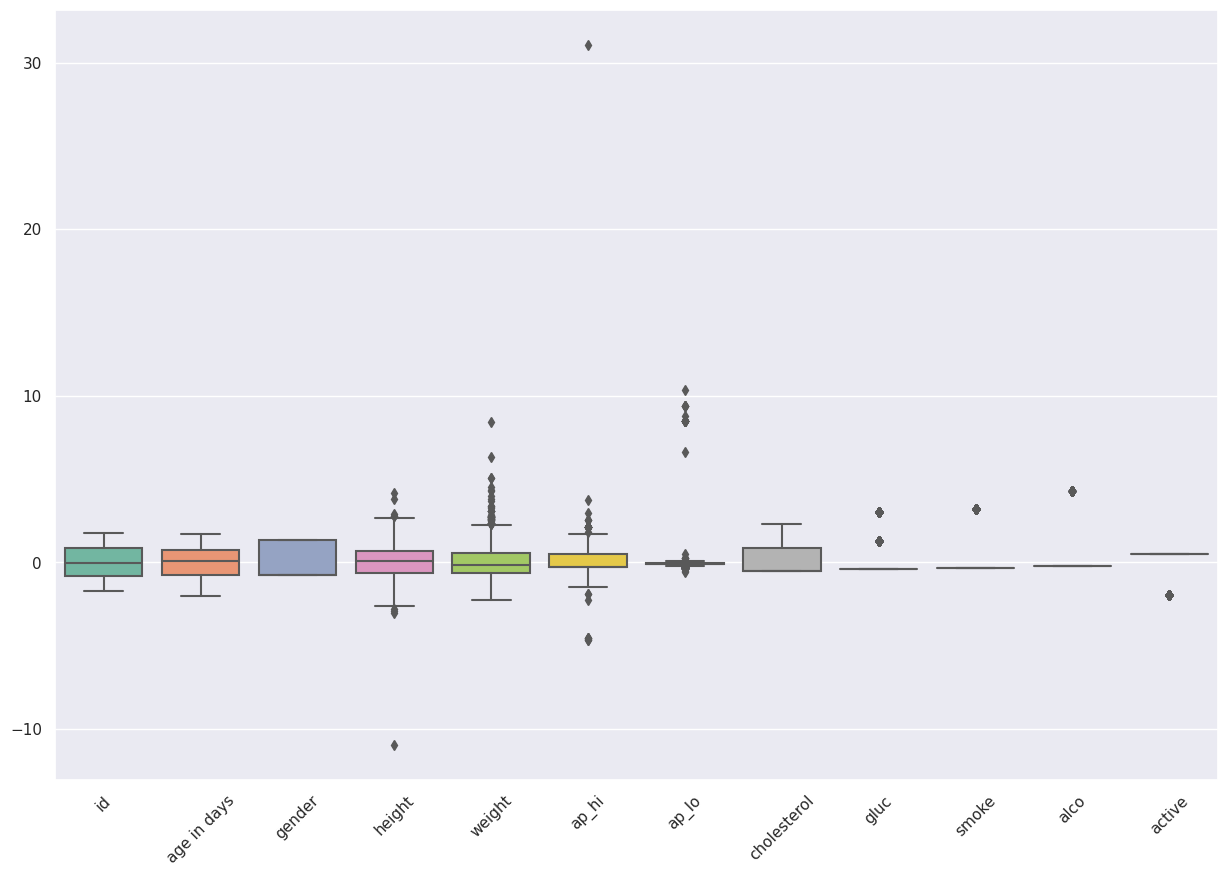

In [17]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

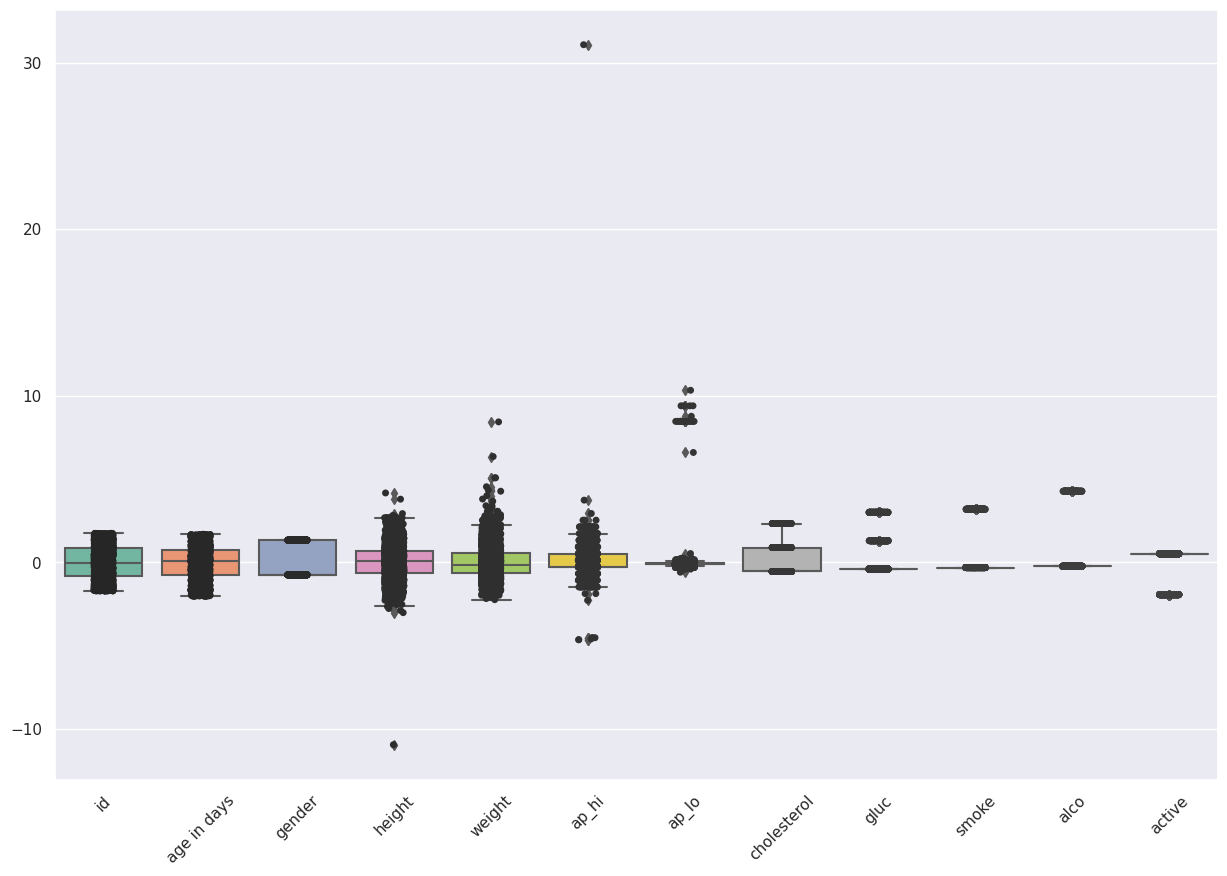

In [18]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

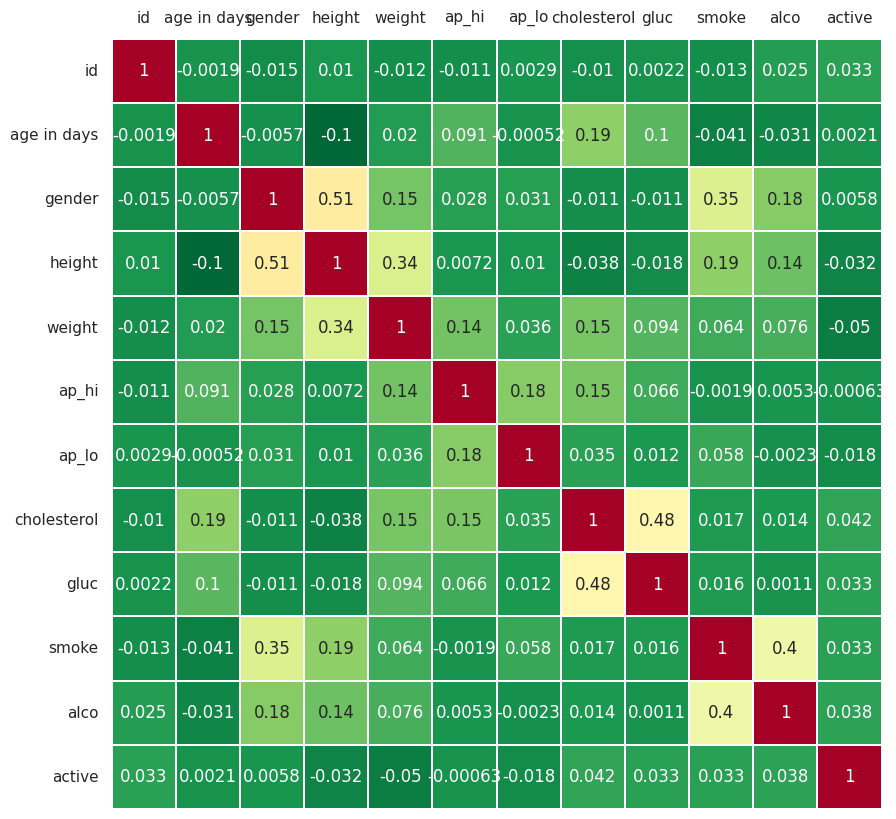

In [19]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

**Principal Component Analysis (PCA)**

Text(0, 0.5, 'Z2')

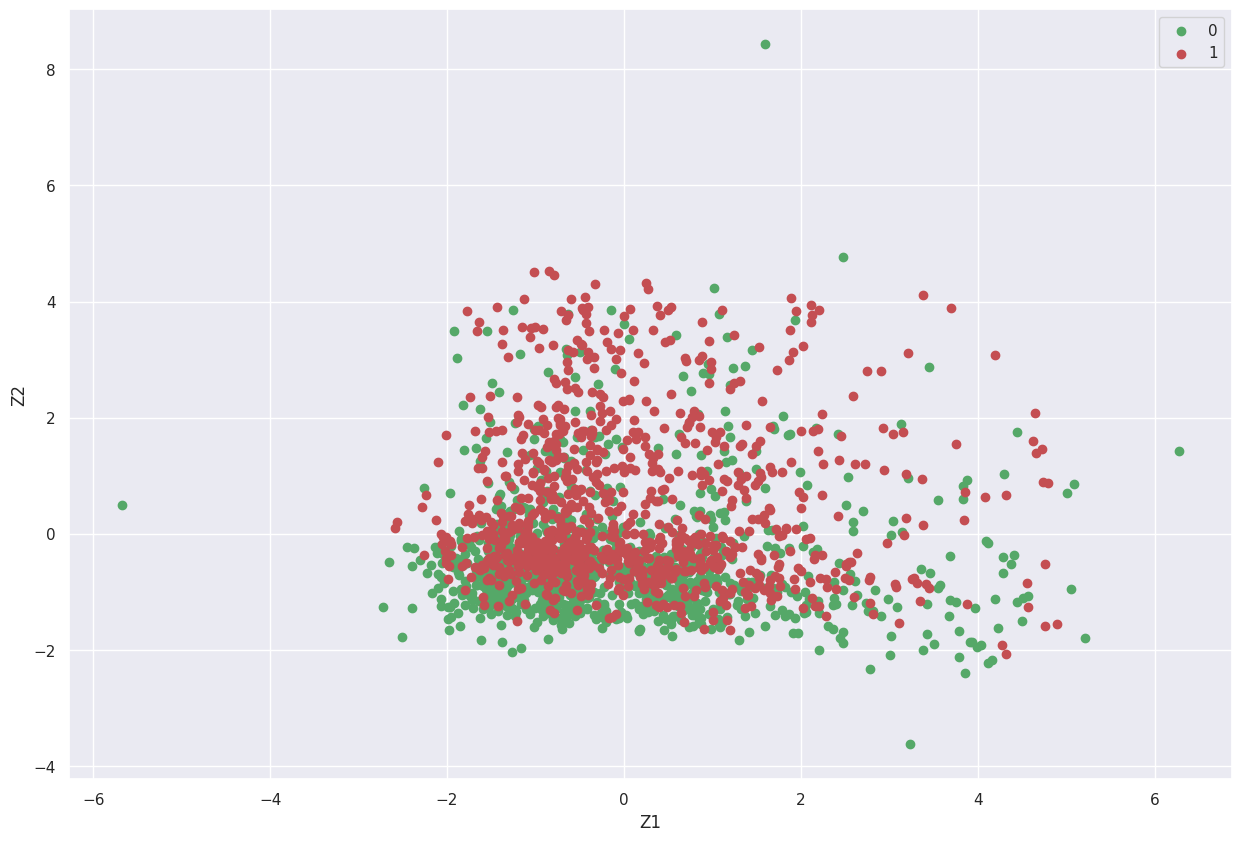

In [20]:
pca = PCA()
Z = pca.fit_transform(X)


idx_0= np.where(y == 0)
idx_1 = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_0,0], Z[idx_0,1], c='g', label='0')
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='r', label='1')


plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

**Eigenvectors**

array([[-0.00488422, -0.01498397, -0.1112328 ,  0.03477928,  0.86344087,
         0.47949671,  0.01669118, -0.04160086,  0.06035872, -0.06676586,
        -0.01463416,  0.01994515],
       [-0.0473598 ,  0.3324979 , -0.06112081,  0.0315359 , -0.12360725,
         0.27786113, -0.82800149, -0.1308045 , -0.24558583,  0.03972457,
         0.12545429, -0.09828969],
       [ 0.52312463, -0.10139071,  0.0564366 , -0.089662  ,  0.00291738,
        -0.07045932, -0.2208618 , -0.3894206 ,  0.31189211,  0.05439404,
        -0.10741777,  0.62262416],
       [ 0.50894377, -0.10678168,  0.29490176, -0.26522757,  0.13925278,
        -0.10448939, -0.04809006, -0.13723174,  0.01891346,  0.29725481,
         0.0218164 , -0.65697224],
       [ 0.33481942,  0.20504344,  0.39736805, -0.20495419,  0.1127377 ,
        -0.03414029,  0.04185027,  0.45398103, -0.50699802, -0.29275349,
         0.07934616,  0.27417618],
       [ 0.09103609,  0.30998999,  0.31193751,  0.48911281,  0.05908367,
        -0.08318249, -

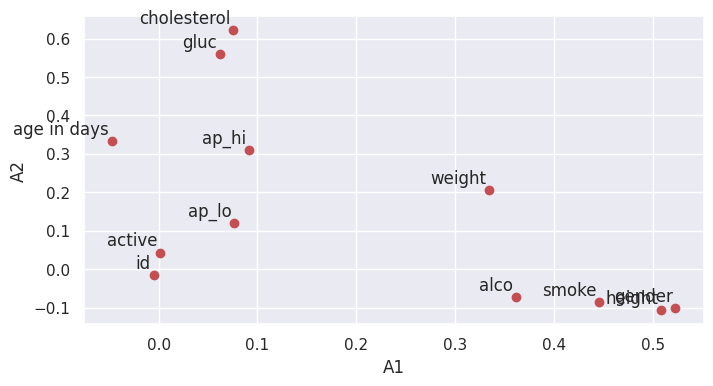

In [21]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

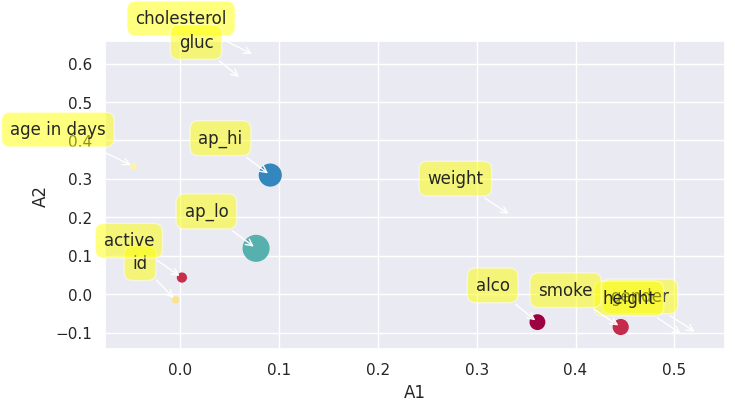

In [22]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree Plot and Eigenvalues**

array([2.01781814, 1.67697471, 1.20743487, 1.1148176 , 1.01469244,
       0.9570164 , 0.93809614, 0.85300533, 0.74779537, 0.56943067,
       0.50090368, 0.40802065])

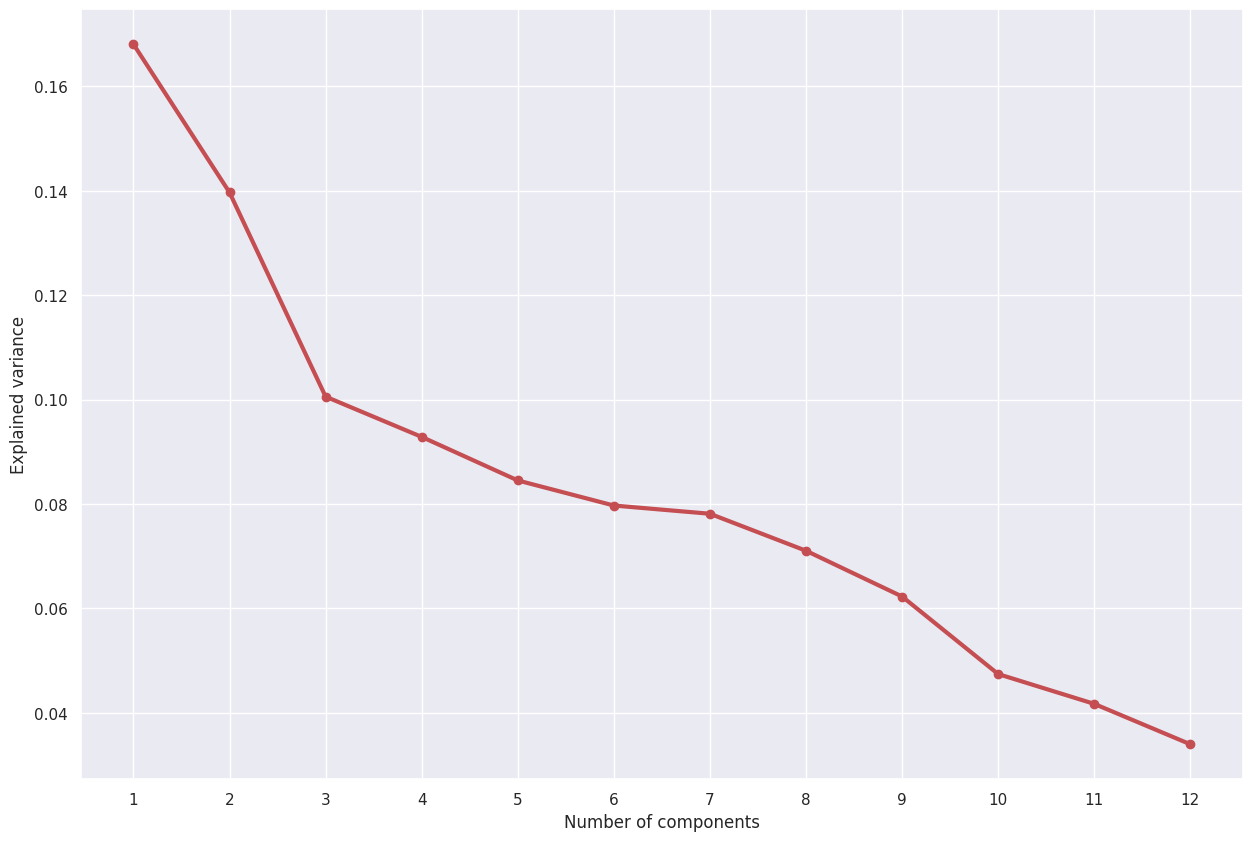

In [23]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

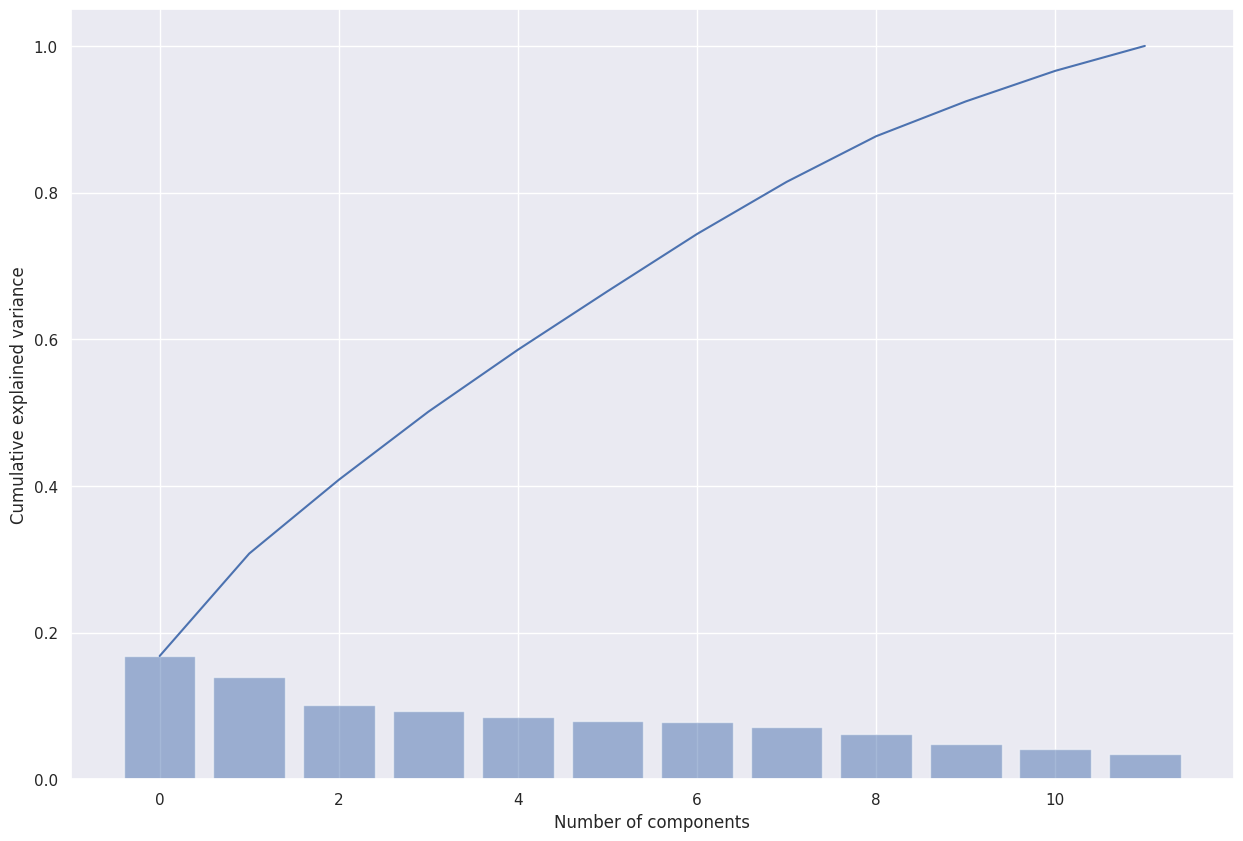

In [24]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([-1.19456803,  1.9100191 ,  1.06704657, ..., -0.78891417,
       -0.96542427, -0.3250063 ])

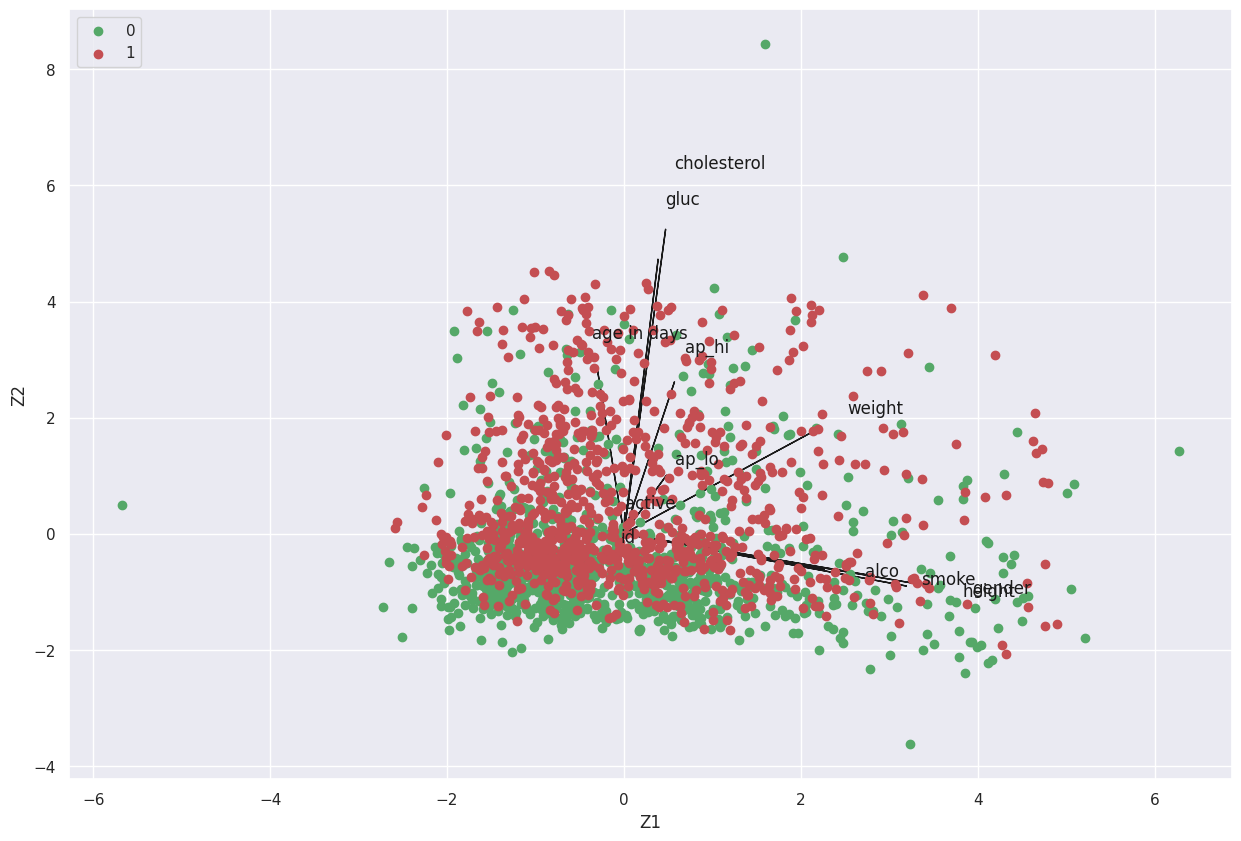

In [25]:
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_0,0], Z[idx_0,1], c='g', label='0')
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='r', label='1')

plt.legend(loc='upper left')
Z1
Z2

**Using PCA Library**

In [26]:
!pip install pca

In [27]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [12] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [11] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [12] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[11]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [28]:
out['PC']

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.313459 -1.194568  0.041322 -0.475003 -1.209235 -1.477376 -0.338087   
1    -0.717554  1.910019  0.034234  0.091432 -1.331942 -1.126134 -0.058129   
2    -0.651036  1.067047  0.617760 -0.455373 -2.272372  0.606217  0.873484   
3     1.000936 -0.515279  1.177360  0.119256 -0.895695 -1.763613 -0.212427   
4    -1.705205 -1.282115  0.128799 -0.345595 -2.423612  0.691096  1.071566   
...        ...       ...       ...       ...       ...       ...       ...   
1994  2.744618  2.805853 -2.030607 -0.332566  1.247563  0.468461  1.155292   
1995  0.532548 -0.340949  0.131585 -0.064459  1.732973  0.485867 -1.505372   
1996 -1.265433 -0.788914 -0.615126 -0.010234  1.663178  0.431627  0.316709   
1997 -0.065295 -0.965424 -1.083982  1.734570  0.022038  2.651297  0.852134   
1998  0.607124 -0.325006  0.728478 -0.648947  0.885331  1.971497  0.698658   

           PC8       PC9      PC10      PC11  
0    -0.989547  0.392295  0.562984 -0.163299  
1     0.916525 -0.455388 -0.468424 -1.733518  
2    -0.036110  0.597161  0.248324 -1.990512  
3     0.224362  0.650303  0.245335  0.069854  
4    -0.340515  0.191281  0.105179 -0.150807  
...        ...       ...       ...       ...  
1994 -1.184098  1.364236 -2.001975  0.443667  
1995 -0.569184  0.281937  0.111564  0.110205  
1996  0.222837 -0.357144 -0.395252  0.024640  
1997 -0.019810  1.746183 -2.355659  0.347021  
1998 -0.955293  1.066303  0.169167 -1.279647  

[1999 rows x 11 columns]

**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '11 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (16.8% expl.var)', ylabel='PC2 (13.9% expl.var)'>)

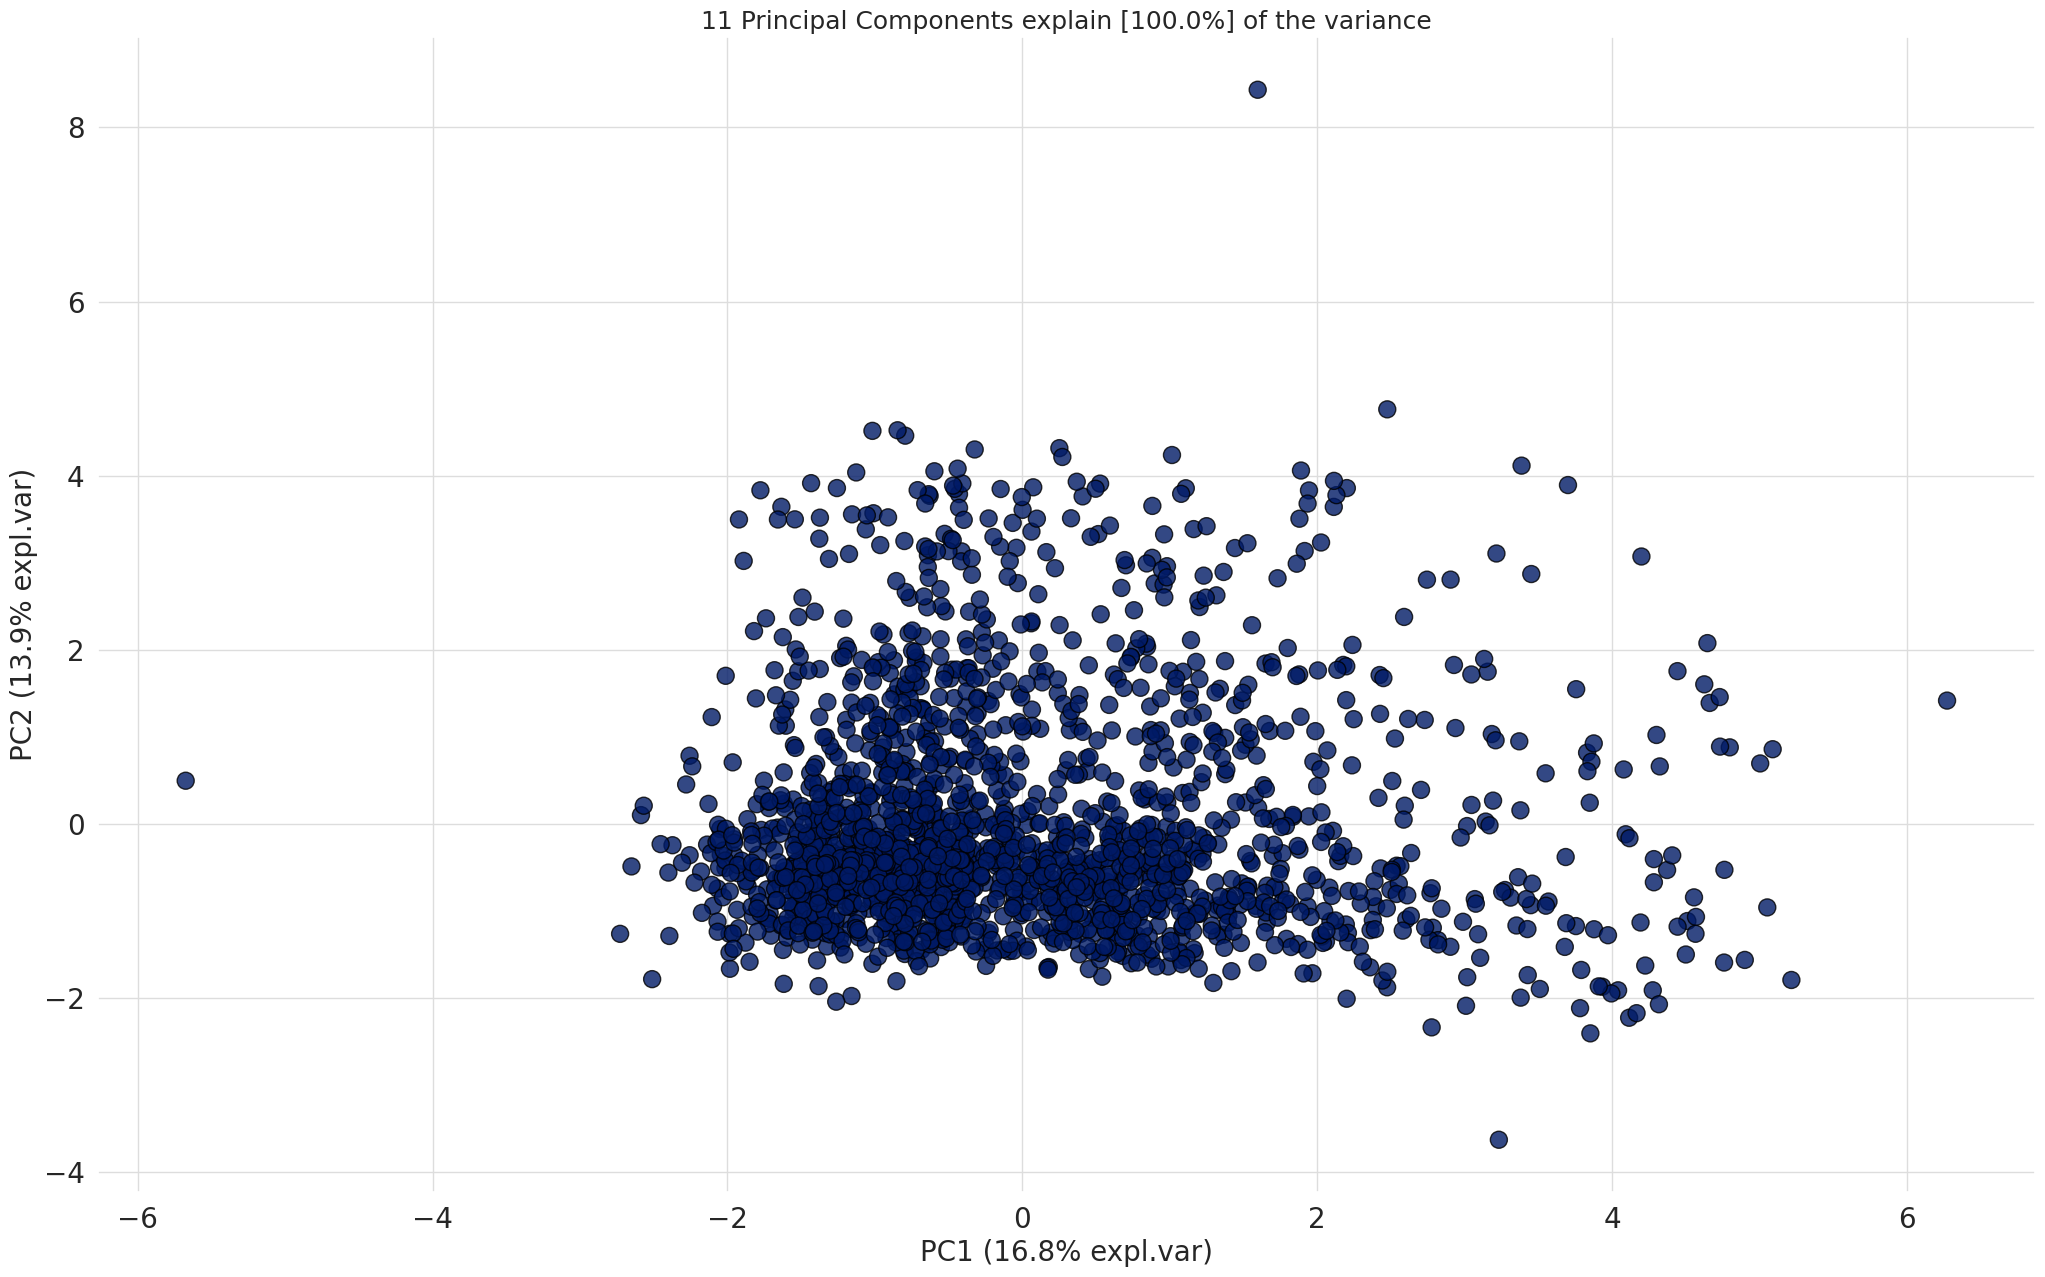

In [29]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [30]:
A = out['loadings'].T
A

PC1       PC2       PC3       PC4       PC5       PC6  \
id          -0.004884 -0.014984 -0.111233  0.034779  0.863441  0.479497   
age in days -0.047360  0.332498 -0.061121  0.031536 -0.123607  0.277861   
gender       0.523125 -0.101391  0.056437 -0.089662  0.002917 -0.070459   
height       0.508944 -0.106782  0.294902 -0.265228  0.139253 -0.104489   
weight       0.334819  0.205043  0.397368 -0.204954  0.112738 -0.034140   
ap_hi        0.091036  0.309990  0.311938  0.489113  0.059084 -0.083182   
ap_lo        0.076676  0.119372  0.253367  0.682742  0.048176 -0.055859   
cholesterol  0.075120  0.621711 -0.145368 -0.129629 -0.024235  0.001057   
gluc         0.061664  0.560525 -0.199857 -0.225522 -0.005920 -0.009410   
smoke        0.445743 -0.085320 -0.393889  0.225393 -0.173800  0.115351   
alco         0.361448 -0.072686 -0.455042  0.216752 -0.115759  0.219037   
active       0.001621  0.043310 -0.388654  0.081171  0.396283 -0.777442   

                  PC7       PC8       PC9      PC10      PC11  
id           0.016691 -0.041601  0.060359 -0.066766 -0.014634  
age in days -0.828001 -0.130805 -0.245586  0.039725  0.125454  
gender      -0.220862 -0.389421  0.311892  0.054394 -0.107418  
height      -0.048090 -0.137232  0.018913  0.297255  0.021816  
weight       0.041850  0.453981 -0.506998 -0.292753  0.079346  
ap_hi       -0.137566  0.416321  0.584818  0.020360  0.102562  
ap_lo        0.222482 -0.462587 -0.413123  0.098652 -0.010534  
cholesterol  0.150966 -0.059681  0.044427 -0.030152 -0.728570  
gluc         0.324682 -0.209503  0.102096  0.121266  0.642922  
smoke        0.046899 -0.037330  0.049364 -0.678748  0.096060  
alco         0.084238  0.405785 -0.186314  0.574811 -0.032950  
active      -0.235294  0.061328 -0.138324 -0.008542  0.025111

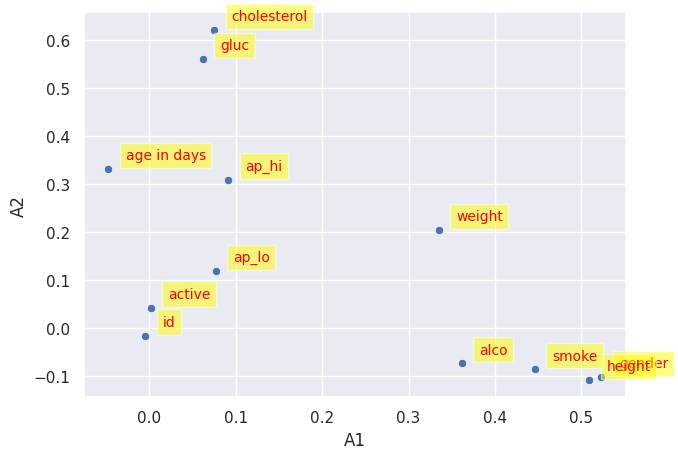

In [31]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

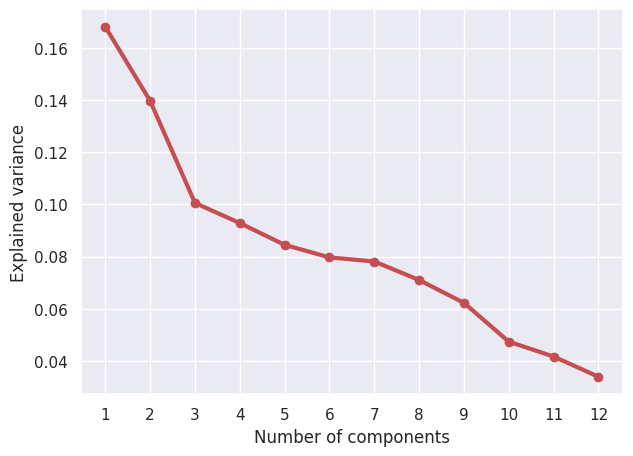

In [32]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

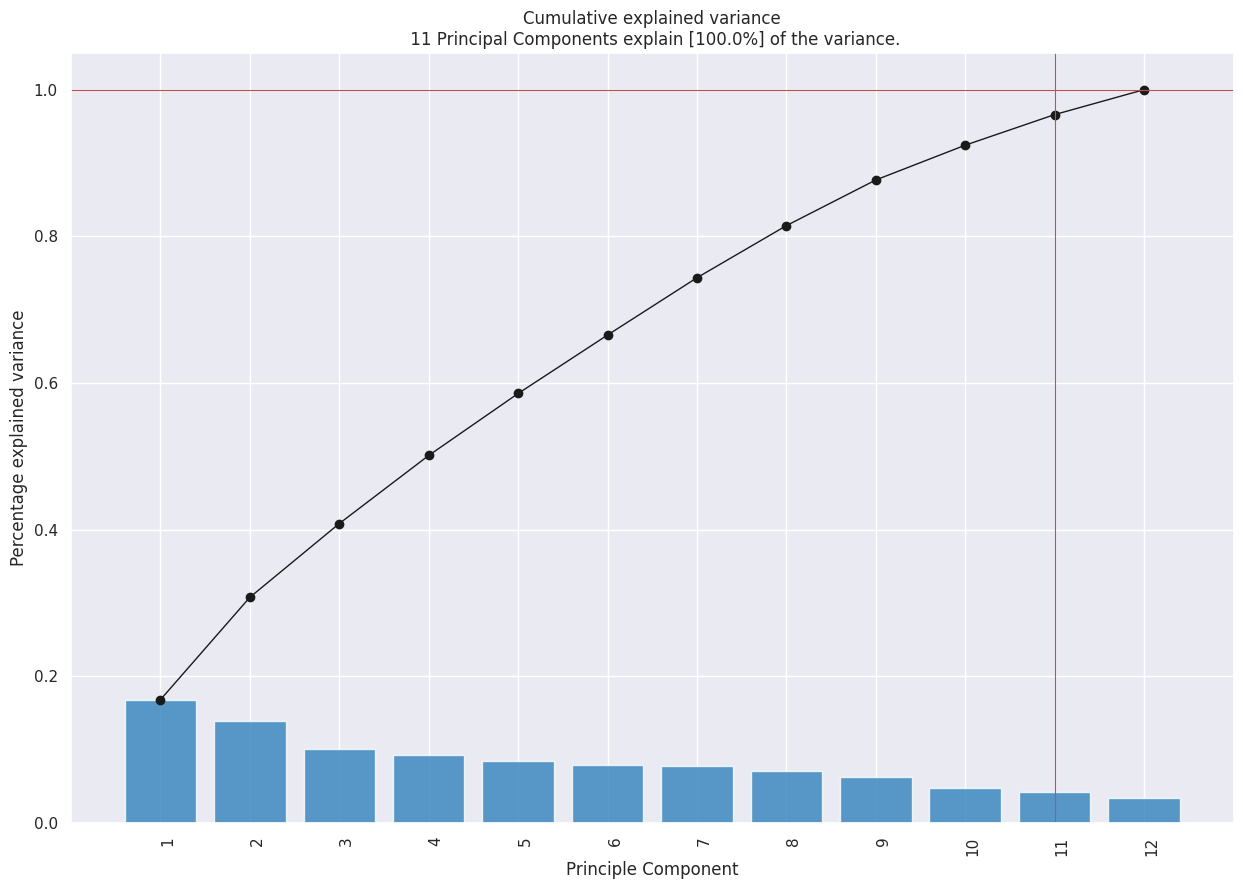

In [33]:
model.plot();

**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '11 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (16.8% expl.var)', ylabel='PC2 (13.9% expl.var)'>)

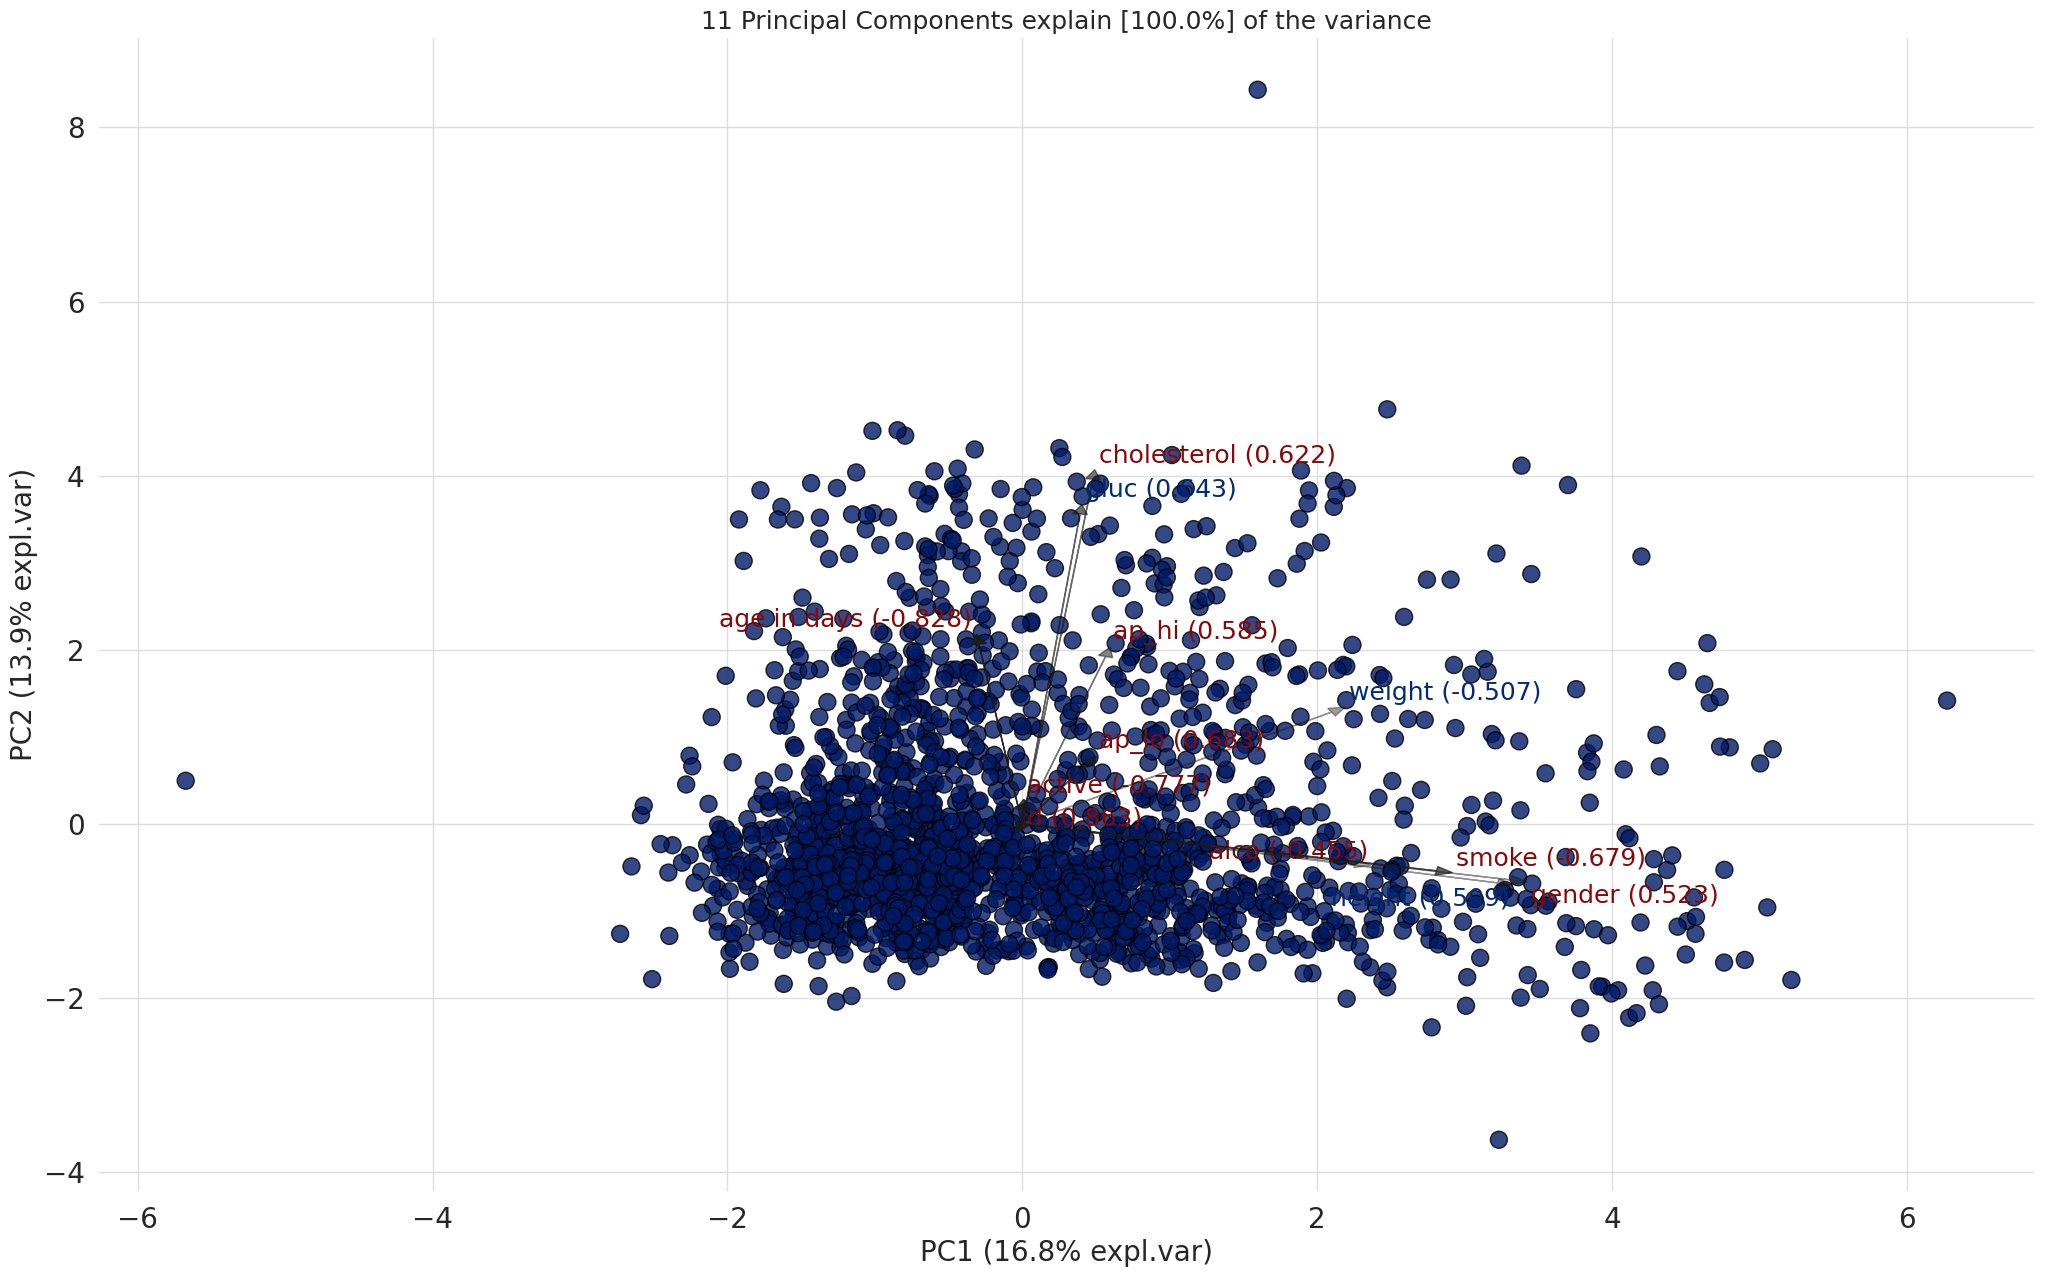

In [34]:
model.biplot(label=False, legend=False, color_arrow='k')

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3DSubplot: title={'center': '11 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (16.8% expl.var)', ylabel='PC2 (13.9% expl.var)', zlabel='PC3 (10.0% expl.var)'>)

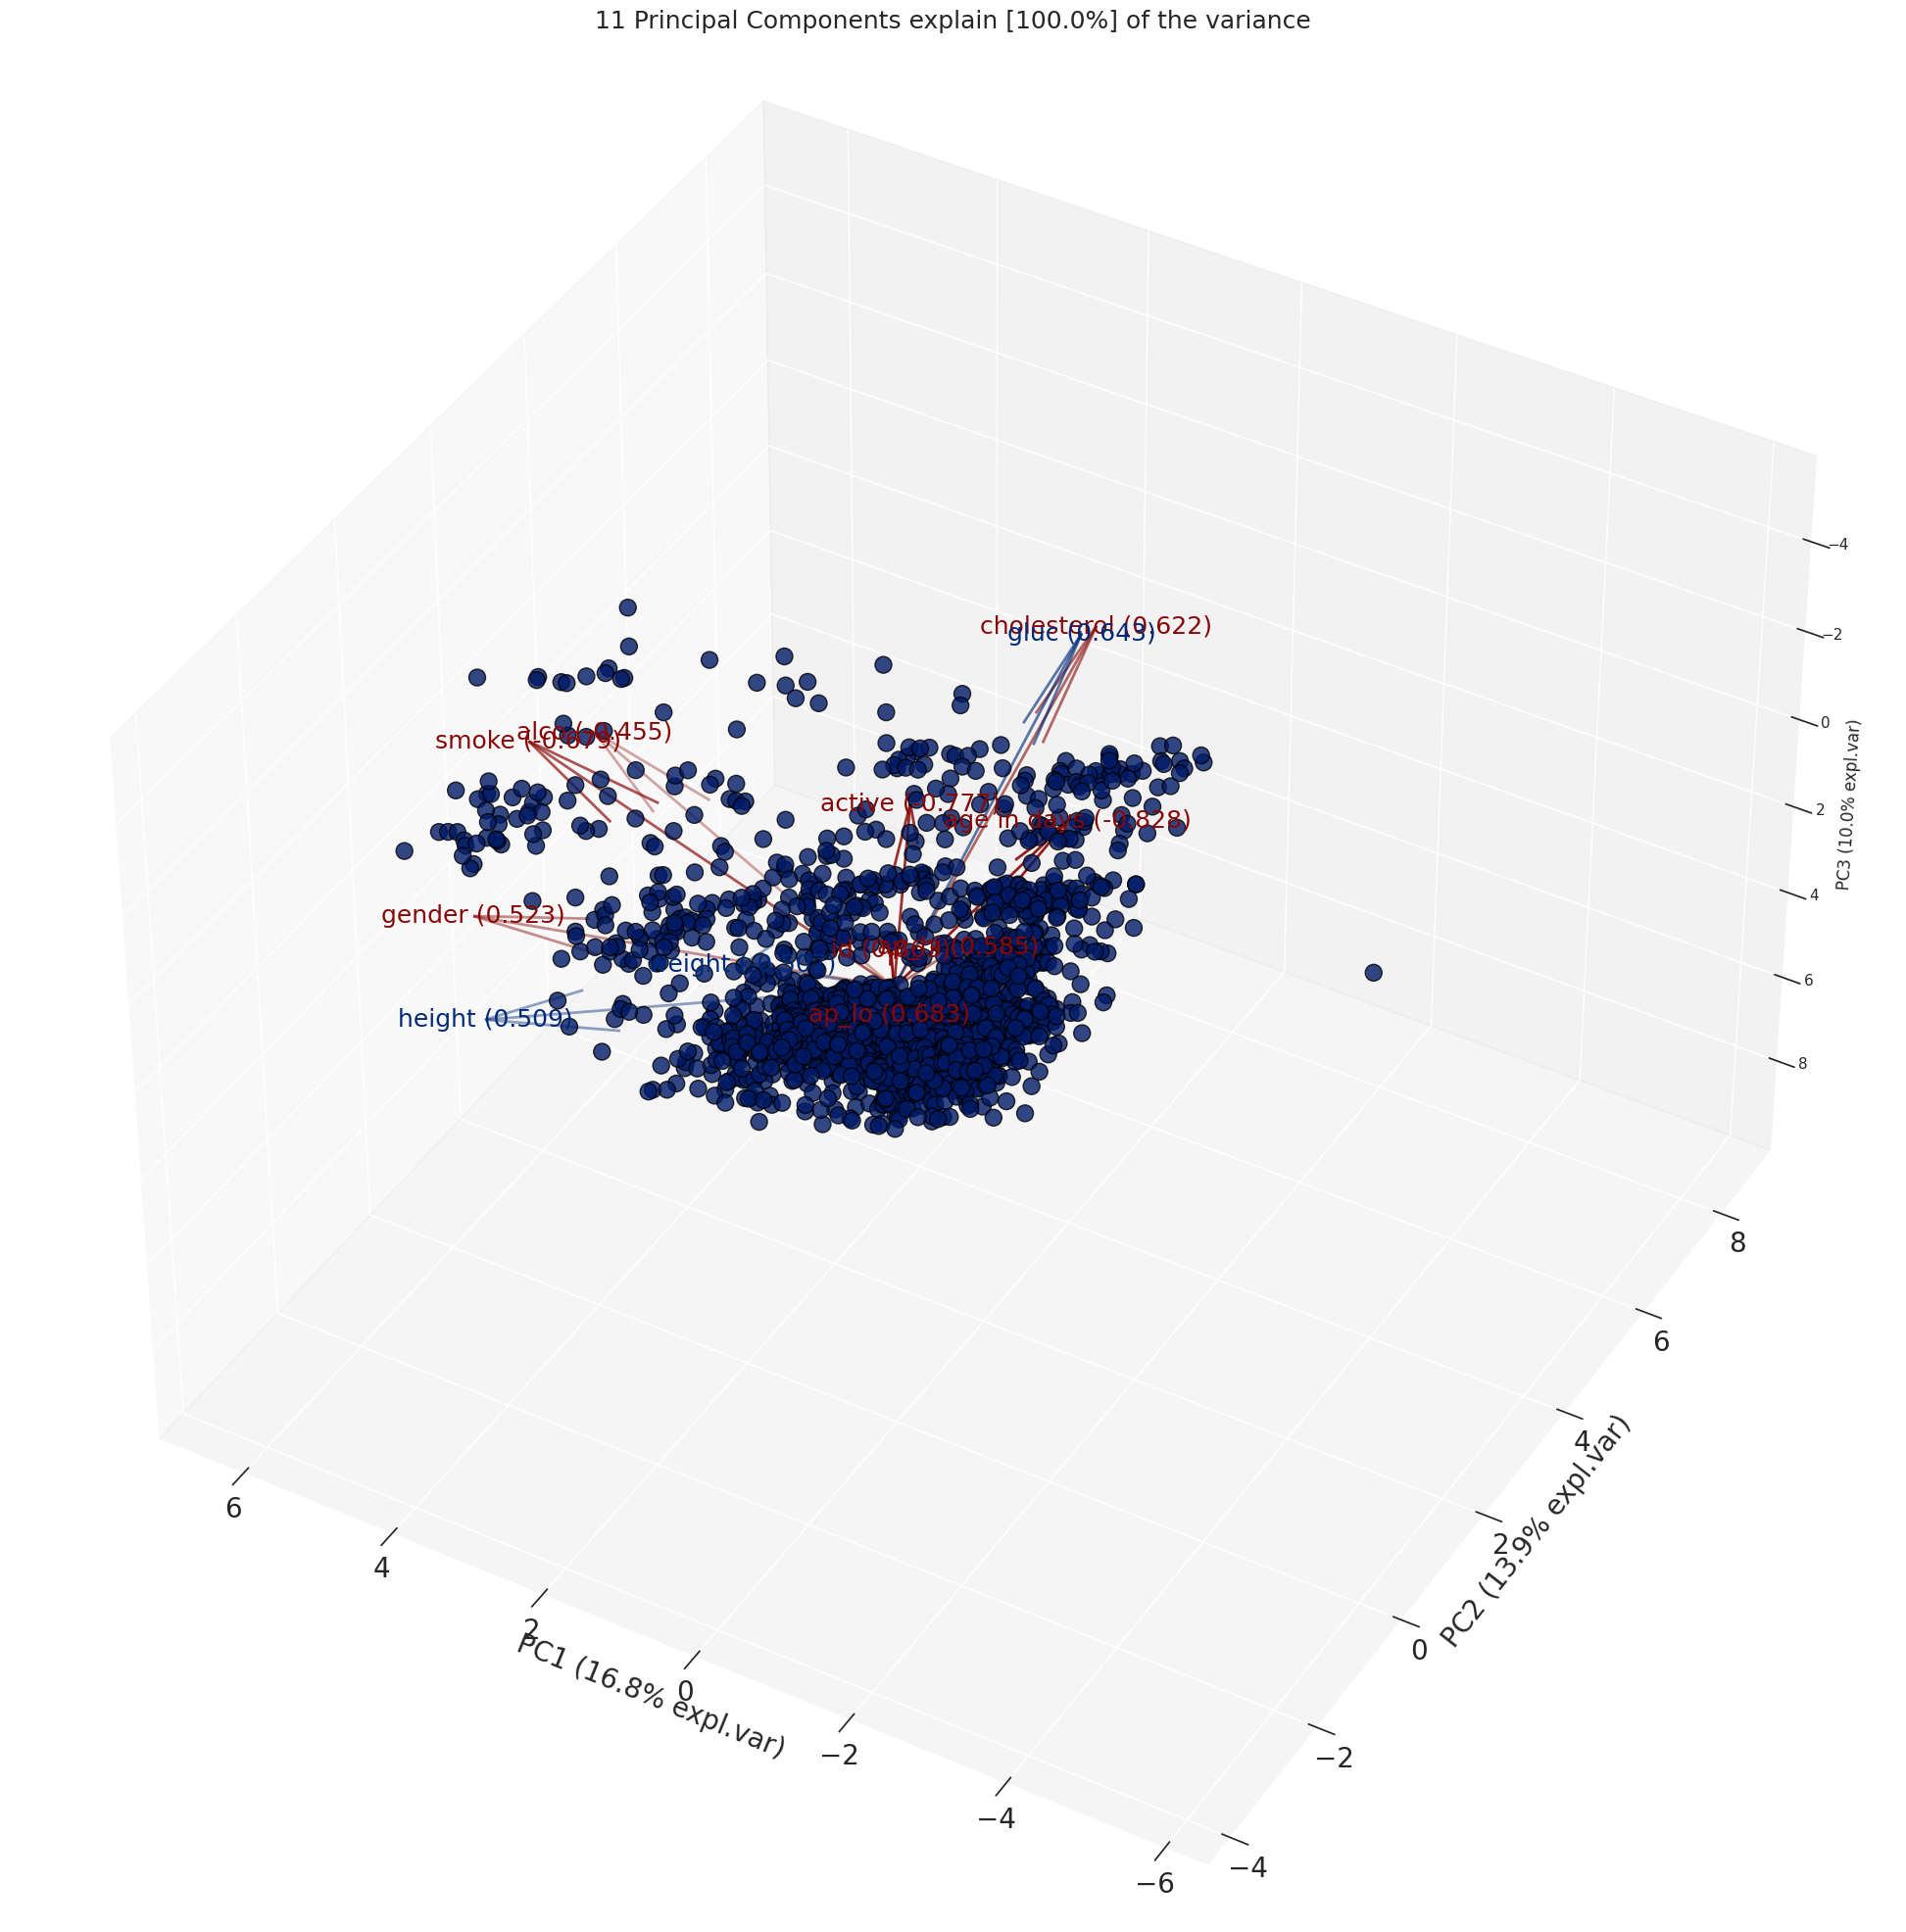

In [35]:
model.biplot3d(legend=False)

**Classification using Pycaret**

At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. Before applying PCA, the output from compare_models() function shows that Gradient Boosting Classifier, Ada Boost Classifier, and Light Gradient Boosting Machine shows the best performance.

However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA

In [36]:
from pycaret.utils import version
version()

'3.0.0'

In [37]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1799, 13)
Unseen Data For Predictions: (200, 13)


In [38]:
from pycaret.classification import *
clf = setup(data=data, target='cardio', train_size=0.7, session_id=123)

**Comparing all models**

In [39]:
best_model = compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [40]:
best_model

**Create Model with Ada Boost Classifier**

In [41]:
ada = create_model('ada')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune the model**

In [42]:
tuned_ada=tune_model(ada)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [43]:
tuned_ada

AdaBoostClassifier(algorithm='SAMME', base_estimator='deprecated',
                   estimator=None, learning_rate=0.4, n_estimators=230,
                   random_state=123)

In [44]:
pip install pycaret --upgrade

  Using cached pycaret-3.2.0-py3-none-any.whl (484 kB)
  Attempting uninstall: pycaret
    Found existing installation: pycaret 3.0.0
    Uninstalling pycaret-3.0.0:
      Successfully uninstalled pycaret-3.0.0


In [45]:
evaluate_model(tuned_ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Model with Gradient Boost Classifier**

In [46]:
gbc = create_model('gbc')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune the model**

In [47]:
tuned_gbc=tune_model(gbc)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [48]:
tuned_gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='log_loss', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_samples_leaf=2,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=140, n_iter_no_change=None,
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [49]:
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Light Gradient Boosting Machine**

In [50]:
lightgbm = create_model('lightgbm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune the model**

In [51]:
tuned_lightgbm=tune_model(lightgbm)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [52]:
tuned_lightgbm

LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=80, n_jobs=-1, num_leaves=60, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.4,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [53]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Classification + PCA**

In [54]:
!pip install statsmodels --upgrade

In [55]:
from pycaret.classification import *

In [56]:
clf_pca = setup(data=df, target='cardio', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 11)

**Comparing Models**

In [57]:
best_model_pca = compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

**Best model with PCA**

In [58]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune Best Model**

In [59]:
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [60]:
pip install --upgrade pycaret


**Evaluate Best Model**

In [61]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Model with Light Grading Boosting Machine**

In [62]:
lightgbm_pca = create_model('lightgbm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [63]:
tuned_lightgbm_pca = tune_model(lightgbm_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [64]:
tuned_lightgbm_pca

LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [65]:
evaluate_model(tuned_lightgbm_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Model with Gradient Boosting Classifier**

In [66]:
gbc_pca = create_model('gbc')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [67]:
tuned_gbc_pca = tune_model(gbc_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [68]:
tuned_gbc_pca

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='log_loss', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_samples_leaf=2,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=140, n_iter_no_change=None,
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [69]:
evaluate_model(tuned_gbc_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Model with Logistic Regression**

In [70]:
lr_pca = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [71]:
tuned_lr_pca = tune_model(lr_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [72]:
tuned_lr_pca

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [74]:
et_pca = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [75]:
tuned_et_pca = tune_model(et_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [76]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_samples_leaf=4, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [77]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [78]:
 !pip install shap

In [79]:
import shap



In [80]:
!pip install pycaret[analysis]

In [81]:
!pip install --upgrade pycaret[full]

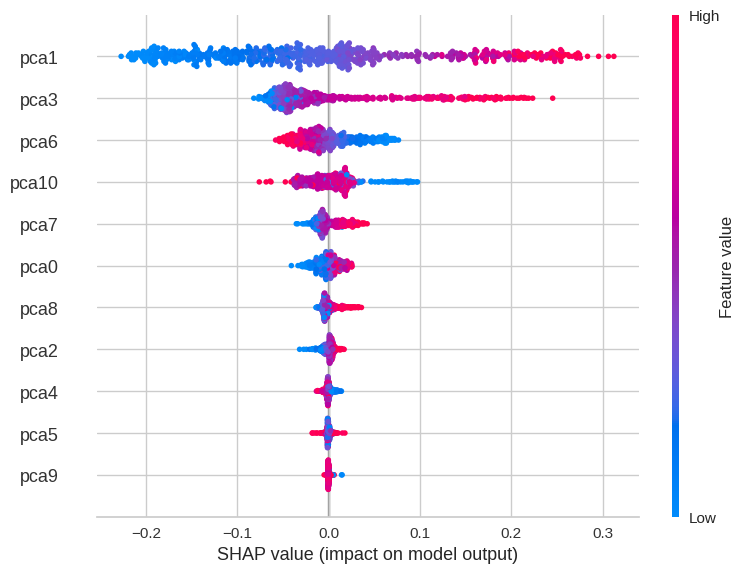

In [82]:
interpret_model(tuned_et_pca, plot='summary')

In [83]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

In [85]:
interpret_model(tuned_et_pca, plot='reason')